In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [61]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time
import seaborn as sns

#sklearn libraries
from sklearn.model_selection import train_test_split

#keras packages
import keras
from keras.preprocessing import image
from keras.utils.np_utils import to_categorical

In [3]:
#define the root directory
root_dir = "../input/cat-and-dog/training_set/training_set"
folders = os.listdir(root_dir)
print(folders)

['dogs', 'cats']


In [57]:
# prepare training  data
#labeling dogs -- 0 cats -- 1

target_size = (32,32)

def prepare_training_data(root_dir,folders):
    X,y = [],[]
    
    label = 0 # starting with dogs
    
    for dir_name in folders:
        print("preparing the directory---------------------------->",dir_name)
        path = os.path.join(root_dir,dir_name)
        print(path)
        for pic in os.listdir(path):
            if str(pic) != "_DS_Store":
                img = image.load_img(path + '/' + pic ,target_size = target_size)
                img_arr = image.img_to_array(img , data_format="channels_last")
                img_arr = img_arr.astype("float32")
                X.append(img_arr)
                y.append(int(label))
            
        label += 1 # next for cats
    
    X = np.array(X)
    y = np.array(y)
    print("preparation Complated..............")
    return X,y
    
X_train,y_train = prepare_training_data(root_dir,folders)

preparing the directory----------------------------> dogs
../input/cat-and-dog/training_set/training_set/dogs
preparing the directory----------------------------> cats
../input/cat-and-dog/training_set/training_set/cats
preparation Complated..............


In [76]:
img = plt.imread('../input/cat-and-dog/training_set/training_set/cats/cat.1.jpg')
plt.imshow(img)

ValueError: fname must be a PathLike or file handle

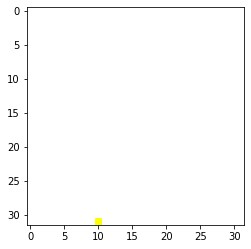

In [72]:
plt.imshow(X_train[0])

## Test data preparation

In [24]:
root_dir_test = '../input/cat-and-dog/test_set/test_set'
folder_test = os.listdir(root_dir_test)
print(folder_test)

['dogs', 'cats']


In [27]:
# prepare the test data 
#there is not need for label it so litely changed the code

target_size = (32,32)

def prepare_test_data(root_dir,folders):
    X = []
    
    
    for dir_name in folders:
        print("preparing the directory---------------------------->",dir_name)
        path = os.path.join(root_dir,dir_name)
        print(path)
        for pic in os.listdir(path):
            if str(pic) != "_DS_Store":
                img = image.load_img(path + '/' + pic ,target_size = target_size)
                img_arr = image.img_to_array(img , data_format="channels_last")
                img_arr = img_arr.astype("float32")
                X.append(img_arr)
        
    X = np.array(X)
    
    print("preparation Completed!!!..............")
    return X
    
test = prepare_test_data(root_dir_test,folder_test)

preparing the directory----------------------------> dogs
../input/cat-and-dog/test_set/test_set/dogs
preparing the directory----------------------------> cats
../input/cat-and-dog/test_set/test_set/cats
preparation Completed!!!..............


## 2) Preprocessing the Data

2.1) check for null values<br>
2.2) Normalization <br>
2.3) One hot encoding (Target) <br>
2.4) Split the data(train and validation)  <br>
2.5) Data Agumentation <br>

### Check for null values.
If there any null vales means , you have fill it with correct data or leave it.

In [31]:
# merge that two things for check is there any null values
train = pd.DataFrame([X_train,y_train])
train.isnull().any().sum()

0

In [32]:
train.isnull().any().describe()

count         1
unique        1
top       False
freq          1
dtype: object

## Normalization
scaling is utilised to reduce the effect of illumination differences and to increase the efficiency of the training.

In [43]:
X_train = (X_train)/255.0
test = (test)/255.0

## One hot Encoding the target

change the target like 1 to -->[0,1] and --> [1,0]

In [58]:
y_train

array([0, 0, 0, ..., 1, 1, 1])

In [59]:
y_train = to_categorical(y_train,2)
print(y_train)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


## Split the data

In [60]:
# set the random seed
random_seed =2 

In [65]:
#split the data
X_train , X_val,y_train,y_val = train_test_split(X_train,y_train,test_size = 0.2, random_state =random_seed )

In [66]:
print("The size of the train data",X_train.shape)
print("The size of the train target data",y_train.shape)
print("The size of the validation data",X_val.shape)
print("The size of the validation target data",y_val.shape)

The size of the train data (5763, 32, 32, 3)
The size of the train target data (5763, 2)
The size of the validation data (1441, 32, 32, 3)
The size of the validation target data (1441, 2)


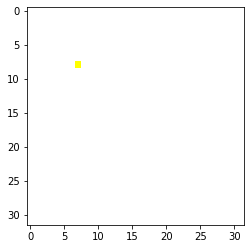

In [68]:
plt.imshow(X_val[0])

## Data Agumentation